In [1]:
#functions

import math
import random


# makes a ticket
def ticket_generator(t, o, a):
    ticket={
        'time': t,
        'owner': o,
        'action': a,
    }
    return ticket;


# depending on parameter (spread or cure), generates tau
def nextTime(rateParameter, n):
    taus=[0]*n
    for i in range(0,n): #start at zero, stops just short of n
        taus[i]=-math.log(1.0 - random.random()) / rateParameter #math.log is in base e, and random.random picks a number from range 0.0 to 1.
    return taus #generates n-length list, starting at index 0


#writes the edges to a network of n ppl where everyone is connected to everyone else 
def network_writer(n):
    connect=[0]*n
    for i in range(n): 
        a=list(range(n)) #generating a list that goes from 0 to n-1
        a.remove(i) #individual removes themselves from the network
        connect[i]=a #corresponds to the list of people person i is linked to
    return connect; #returns a list of lists with all the connections in the network

#writes the edges of a network of n ppl where everyone is connected to up to n_conn individuals 
def alt_network_writer(num_ppl, n_conn):
    connect[0]*n
    for i in range(n):
        a=list(range(n)) #generating a list that goes from 0 to n-1
        a.remove(i) #individual removes themselves from the network
        a.remove
        random.choice(a)
    

#Checks the proportion of agents in infected state at regular intervals
def timechecktickethandler(prop_inf, ppl_state, num_ppl, check_acc):
    prop_inf[check_acc]=sum(ppl_state)/num_ppl


#ONCE NETWORKS ARE NOT SMALL WORLD, WILL NEED TO PASS IN CONNECT TO FUNCTION TO SEE WHO CAN BE INFECTED BY THE OWNER 
#(ow) AND TO GENERATE THE CORRECT LENGTH FOR Ts

#processes spread/infection tickets, returning a new timeline (with added tickets) and an updated list of states
def spreadtickethandler(tic, timeline, spreadparam, cureparam, ppl_state, t_max): 
    ow=tic['owner']
    targ=tic['action'] #this action should not be -1 bc this is passed to spread ticket handler
    if (ow==targ):
        print('Error -- ow=targ, {:d}={:d}' .format(ow,targ)) 

#The spreadtickethandler function is broken into 4 steps, as outlined in appendix B.1.2 of 
#Ruud VAN DE BOVENKAMP's thesis (p. 158)
        
#1
    if(ppl_state[ow]!=1):
        print('Error -- individual {:d} is not infected, but was passed to spreadtickethandler!' .format(ow))
    else:
#2
        t=tic['time']
        if(ppl_state[targ]==1):
            print('{:d} is already infected! at time {:f}' .format(targ,t)) 
        else:
            ppl_state[targ]=1 #Set targ to be infected
            num_ppl=len(ppl_state) #number of people
            ts=[t]*(num_ppl-1) #list of t repeated num_ppl-1 times
            nT=nextTime(spreadparam, num_ppl-1) #generates taus
            cure_t=t+nextTime(cureparam, 1)[0] #using [0] in order to add an integer to t
            spread_ts=[sum(x) for x in zip(ts,nT)] 
            acc=0 #accumulator initialized
            for a in connect[targ]: #Go through all of targ's connections and create spread tickets as necessary
                if(spread_ts[acc]<cure_t and spread_ts[acc]<t_max): #if the spread time occurs before targ is cured and does not exceed t_max
                    tinf=ticket_generator(spread_ts[acc], targ, a) #generate spread ticket
                    add_to_timeline(tinf, timeline) #add spread ticket to timeline
                acc=acc+1 #accumulator incremented
            if cure_t<t_max: #if the cure time doesn't exceed t_max
                tcure=ticket_generator(cure_t, targ, -1) #generate cure ticket
                add_to_timeline(tcure, timeline) #add cure ticket to timeline
#3
        #in our code, timechecktickethandler checks the infected count at certain time intervals
#4
        spread_t2=t+nextTime(spreadparam,1)[0] #spread_t2 is the time for respreading from ow to targ
        cure_t_ow=t_max+1 #just so we don't get an error on line 91 if cure_t_ow isn't generated in the while loop bc it's too big
        i=timeholder #timeholder is index of timeline
        curefound=0 #a flag for the while loop
        #looking for the curetime of each individual
        while curefound==0 and i<(len(timeline)-1): #while cure is not found and we aren't beyond last index of timeline
            tim=timeline[i]
            if(tim['owner']==ow): 
                if(tim['action']==-1): #-1 is action associated with cure tickets
                    cure_t_ow=tim['time'] #set cure time of owner
                    curefound=1 #stop when cure is found
            i=i+1 
        if(spread_t2<cure_t_ow and spread_t2<t_max): #if re-infection spread time is less cure time of owner and doesn't exceed t_max
            spread2tic=ticket_generator(spread_t2, ow, targ) #make a spread ticket for re-infection of targ by ow
            add_to_timeline(spread2tic, timeline) #add spread ticket to timeline
        return [timeline, ppl_state];
            
        
    
#processes cure tickets, returning the new states of ppl        
def curetickethandler(tic, ppl_state):
    ow=tic['owner']
    ppl_state[ow]=0
    return ppl_state

#adds new tickets to timeline -- Stefano, any more efficient suggestions for keeping timeline in order?
def add_to_timeline(tic, tim):
    if not tim:
        return [tic]
    ind=len(tim)-1
    end=0
    while (tic['time']<tim[ind]['time'] and end==0): #moves backwards until it finds where to place the ticket based on the listed times
        ind=ind-1 
        if(ind<0):
            end=1
    ind=ind+1
    tim.insert(ind, tic)
    return tim

#adjusts ind so times can match with nodes correctly (accounts for the fact that in connections, owner is omitted)
def new_ind(ind, ow):
    if(ind>ow):
        ind=ind-1
    return ind

In [3]:
#main -- uses functions described above to simulate SIS dynamics over time using agent based model

t_max=2 #we want to go to 2 time units (trust us, it still takes a while)
sick_ind=0 #we will set individual 0 to start out sick, but could also use random number generator
spreadparam=.5 
cureparam=.3
#curetimearray=[]; #DELETE!!!
timeline=[] #initialize empty timeline
num_ppl=100 #set # of agents
ppl_state=[0]*num_ppl #make a record of everyone's state, starting with all succeptible except...
ppl_state[sick_ind]=1 #starting with 1 infected person, sick_ind
connect=network_writer(num_ppl) #make a network of connections btwn the ppl -- everyone is connected to everyone rn
tinfinit=nextTime(spreadparam, num_ppl-1) #generate the time of the first infection THIS IS NOW ALL THE TIMES -- one for each
tcureinit=nextTime(cureparam, 1)[0] #generate the time of sick_ind's cure
while(all(i < tcureinit for i in tinfinit)): #for the very rare case that no individuals get infected before individual 0 gets cured
    tcureinit=nextTime(cureparam,1) #ensure that that time occurs after patient 0 has infected someone -- just so our sim goes somewhere

smallinds=[] #isolate only those times that are smaller than cure time  
acc=0
for i in connect[sick_ind]:        
    if tinfinit[acc]<tcureinit:
        smallinds.append(i)
    acc=acc+1  
for i in range (len(smallinds)):
    init_inf=ticket_generator(tinfinit[new_ind(smallinds[i], sick_ind)], sick_ind, smallinds[i])#generate a ticket for the first infection 
    timeline=add_to_timeline(init_inf, timeline) #put these 2 tickets on timeline
#we will probably change the above 9 lines to be like what we do in spreadtickethandler, which is more intuitive


init_cure=ticket_generator(tcureinit, sick_ind, -1) # generate a ticket for the first cure
timeline=add_to_timeline(init_cure, timeline) #add it to timeline
l=list(range(0, (t_max)*100, 1))
l2=[.01]*len(l)
check_times=[a*b for a,b in zip(l,l2)] #our list goes from 0 to tmax with intervals of .1
for i in check_times:
    tchecktic=ticket_generator(i, -2, -2) #-2 here indicates that this is a time-check ticket
    add_to_timeline(tchecktic, timeline) #add to timeline
prop_inf=[0]*len(check_times) #initialize proportion infected storage vector
timeholder=0 #timeholder is the index where we are on the timeline (start at 0)
t=0 #we start at a time of 0 
check_acc=0 #accumulator to help us index prop_inf



In [4]:
#main ct'd

while t<t_max:
    #print(t)
    if timeholder>(len(timeline)-1): #if timeholder exceeds max timeline index
        #print(sum(ppl_state)/num_ppl)
        print('end')
        break
    nexttic=timeline[timeholder] #look at the ticket corresponding to where we are on the timeline
    if (nexttic['action']==-1): #if it's a cure ticket, use the corresponding handler
        ppl_state=curetickethandler(nexttic, ppl_state) #handler returns ppl_state
    elif nexttic['action']==-2: #if it's a time check ticket use the corresponding handler
        timechecktickethandler(prop_inf, ppl_state, num_ppl, check_acc) #fills in prop_inf
        check_acc=check_acc+1 #increment accumulator
    else: #if it's a spread ticket, use the corresponding handler
        vec=spreadtickethandler(nexttic, timeline, spreadparam, cureparam, ppl_state, t_max)
        timeline=vec[0] #returns updated timeline
        ppl_state=vec[1] #and updated ppl_state
    t=nexttic['time'] #new time based on the ticket we just read

    
    timeholder=timeholder+1 #increment timeholder
    


0
0.0
0.01
0.010362808599008812
0.018694672576679176
0.02
0.02570059888668451
0.03
0.04
0.04607622590230227
0.05
0.05544598400946397
0.06
0.06673154796052644
0.07
0.07368317575049296
0.07511502507096313
0.0758414036470367
0.07602007690317006
0.07628470605135257
0.07648946674340273
0.0767431535926209
0.07747772732739139
0.07915444316439954
0.08
0.08054763031178404
0.0814388682353835
0.08145075126762374
0.08425076454456916
0.08538421577194887
0.0856866983503188
0.08621238562765751
0.08683401442862435
0.0890802194211674
0.08916032105891676
0.08950853395039647
0.09
15 is already infected! at time 0.092012
0.09201215607262495
89 is already infected! at time 0.092127
0.09212694992045603
0.09234156245888814
0.09375805343414437
0.09432666183566486
8 is already infected! at time 0.097598
0.09759778369864908
0.09791788786608076
0.09823297039045605
0.09917876457488754
0.09930836358164245
0.1
0.10225495273245627
0.10304702973832668
1 is already infected! at time 0.103558
0.10355832409417312
0.1047

0.15311682952375866
86 is already infected! at time 0.153142
0.15314165371473712
0.15365824372662776
26 is already infected! at time 0.153852
0.1538515760536704
24 is already infected! at time 0.154332
0.1543315915037024
45 is already infected! at time 0.154344
0.15434363598947276
59 is already infected! at time 0.154374
0.1543741078565556
38 is already infected! at time 0.154382
0.154382340656259
83 is already infected! at time 0.154399
0.15439865528433663
44 is already infected! at time 0.154572
0.15457185000008122
32 is already infected! at time 0.155083
0.15508326230557978
11 is already infected! at time 0.155201
0.15520135070305358
0.15544492405910346
32 is already infected! at time 0.155581
0.15558064855075737
7 is already infected! at time 0.156100
0.15609968052145573
62 is already infected! at time 0.156262
0.15626239316488
76 is already infected! at time 0.156977
0.15697693789069828
25 is already infected! at time 0.157062
0.15706200967369963
48 is already infected! at time 0.

0.1961935710898902
97 is already infected! at time 0.196240
0.19624026208775494
18 is already infected! at time 0.196466
0.19646649632236707
86 is already infected! at time 0.196575
0.19657549684616288
16 is already infected! at time 0.196639
0.19663946607943636
75 is already infected! at time 0.196702
0.19670236117824985
26 is already infected! at time 0.196714
0.19671424516887276
95 is already infected! at time 0.196784
0.1967841702409895
66 is already infected! at time 0.196856
0.1968561855433749
88 is already infected! at time 0.196934
0.19693407228620005
48 is already infected! at time 0.196979
0.19697891196966386
71 is already infected! at time 0.197397
0.1973971815777259
1 is already infected! at time 0.197422
0.19742205520336997
49 is already infected! at time 0.197698
0.19769775029274592
37 is already infected! at time 0.197713
0.1977134009028888
29 is already infected! at time 0.197828
0.1978284170013871
4 is already infected! at time 0.197874
0.19787364401913524
78 is alread

0.24062298430064472
54 is already infected! at time 0.240641
0.24064076520012131
26 is already infected! at time 0.240709
0.24070918731449958
67 is already infected! at time 0.240716
0.2407162760761392
2 is already infected! at time 0.240898
0.2408975038394292
21 is already infected! at time 0.241001
0.24100076977804333
30 is already infected! at time 0.241067
0.24106706674946704
55 is already infected! at time 0.241575
0.24157482278541453
29 is already infected! at time 0.241921
0.24192119888554764
59 is already infected! at time 0.241987
0.2419870033822898
39 is already infected! at time 0.241998
0.2419977182043287
87 is already infected! at time 0.242768
0.24276803261118116
39 is already infected! at time 0.242858
0.24285839082836388
99 is already infected! at time 0.242959
0.242958672445849
65 is already infected! at time 0.243207
0.24320731863896697
91 is already infected! at time 0.243321
0.2433210520195363
62 is already infected! at time 0.243368
0.24336766536126292
82 is alread

0.2708217347896936
6 is already infected! at time 0.271043
0.2710433494406947
62 is already infected! at time 0.271072
0.27107246004626073
55 is already infected! at time 0.271095
0.2710951289995969
61 is already infected! at time 0.271189
0.2711892730092622
56 is already infected! at time 0.271256
0.27125600310953746
66 is already infected! at time 0.271358
0.27135832943813637
67 is already infected! at time 0.271360
0.2713598018365738
63 is already infected! at time 0.271538
0.2715377340493901
41 is already infected! at time 0.271765
0.2717646392951878
36 is already infected! at time 0.271815
0.27181508243296404
10 is already infected! at time 0.271829
0.27182940707094394
73 is already infected! at time 0.271927
0.27192671277629854
26 is already infected! at time 0.271993
0.2719926682163244
55 is already infected! at time 0.272045
0.2720453295946856
82 is already infected! at time 0.272519
0.2725189034748683
50 is already infected! at time 0.273027
0.2730273484128652
48 is already in

0.3017406440001965
92 is already infected! at time 0.301853
0.30185336280660413
57 is already infected! at time 0.302338
0.3023377071500102
12 is already infected! at time 0.302364
0.30236354841207563
33 is already infected! at time 0.302515
0.30251505602938517
45 is already infected! at time 0.302638
0.30263776269429754
56 is already infected! at time 0.302931
0.3029309942944671
81 is already infected! at time 0.303208
0.3032081158598165
99 is already infected! at time 0.303519
0.3035188205799986
14 is already infected! at time 0.303583
0.3035833169231582
12 is already infected! at time 0.303963
0.3039625135082536
23 is already infected! at time 0.304124
0.3041235900104455
57 is already infected! at time 0.304137
0.3041371312312097
80 is already infected! at time 0.304222
0.30422153525029483
92 is already infected! at time 0.304633
0.30463299327576204
5 is already infected! at time 0.304707
0.30470696733827546
87 is already infected! at time 0.304897
0.304897159259242
79 is already in

28 is already infected! at time 0.338743
0.3387425922284046
73 is already infected! at time 0.338790
0.3387899242449741
1 is already infected! at time 0.338836
0.33883551319808985
24 is already infected! at time 0.339104
0.3391035935262209
42 is already infected! at time 0.339618
0.3396178152118352
20 is already infected! at time 0.339662
0.33966182558136804
7 is already infected! at time 0.339674
0.3396736618955274
5 is already infected! at time 0.339707
0.3397071966390679
60 is already infected! at time 0.339794
0.3397940058798187
87 is already infected! at time 0.339887
0.3398866071374228
22 is already infected! at time 0.339963
0.3399633840516206
0.34
70 is already infected! at time 0.340437
0.3404373199754769
0 is already infected! at time 0.340586
0.34058642707599707
25 is already infected! at time 0.341682
0.34168181187341895
48 is already infected! at time 0.341700
0.3417003516242112
85 is already infected! at time 0.341731
0.34173121578477084
71 is already infected! at time 0.

0.37476383069192043
34 is already infected! at time 0.375551
0.3755505403709228
34 is already infected! at time 0.375670
0.3756695999812953
12 is already infected! at time 0.375767
0.37576680664033757
30 is already infected! at time 0.375813
0.375813283246177
23 is already infected! at time 0.376340
0.37634023204449246
24 is already infected! at time 0.376589
0.3765885244154542
74 is already infected! at time 0.376603
0.37660269355367904
3 is already infected! at time 0.376810
0.37681005503647974
84 is already infected! at time 0.376926
0.3769263093284898
61 is already infected! at time 0.376989
0.37698897677142745
88 is already infected! at time 0.377073
0.37707295315037315
30 is already infected! at time 0.377205
0.3772052426120547
93 is already infected! at time 0.377324
0.3773241088742668
18 is already infected! at time 0.377327
0.3773266553736956
15 is already infected! at time 0.377348
0.3773476939991741
83 is already infected! at time 0.377541
0.37754075956214905
78 is already i

0.41809285357814474
7 is already infected! at time 0.418128
0.41812785981334905
50 is already infected! at time 0.418333
0.41833345479586076
71 is already infected! at time 0.418500
0.418500315288014
36 is already infected! at time 0.418553
0.41855280332552885
57 is already infected! at time 0.419085
0.41908463507714105
86 is already infected! at time 0.419315
0.4193145463006792
84 is already infected! at time 0.419972
0.419971978040548
0.42
39 is already infected! at time 0.420254
0.4202539833236347
69 is already infected! at time 0.420342
0.4203423346347266
72 is already infected! at time 0.420419
0.42041896802757905
63 is already infected! at time 0.420527
0.42052734182623996
69 is already infected! at time 0.420592
0.42059228605811194
62 is already infected! at time 0.420625
0.4206249292461282
2 is already infected! at time 0.420879
0.4208789874441743
83 is already infected! at time 0.421151
0.42115114382605
34 is already infected! at time 0.421199
0.42119898917358883
46 is already

0.45325324418931173
29 is already infected! at time 0.453293
0.45329319052338424
39 is already infected! at time 0.453608
0.45360809187721124
60 is already infected! at time 0.453925
0.4539254735555711
46 is already infected! at time 0.454019
0.45401861162708723
9 is already infected! at time 0.454142
0.45414177642593617
35 is already infected! at time 0.454315
0.45431501128341834
18 is already infected! at time 0.454824
0.45482437199040804
28 is already infected! at time 0.455188
0.45518767213095923
73 is already infected! at time 0.455805
0.45580489994183615
43 is already infected! at time 0.455840
0.4558396649099831
12 is already infected! at time 0.455854
0.4558542793201438
28 is already infected! at time 0.456031
0.4560305336939964
84 is already infected! at time 0.456039
0.4560391503095108
36 is already infected! at time 0.456102
0.4561024413723673
21 is already infected! at time 0.456111
0.45611099031673397
4 is already infected! at time 0.456609
0.45660853619870356
90 is alread

72 is already infected! at time 0.484585
0.4845849800553568
53 is already infected! at time 0.484609
0.48460929017868937
19 is already infected! at time 0.484624
0.4846236907852125
92 is already infected! at time 0.484669
0.48466881097134096
4 is already infected! at time 0.484745
0.4847452727256556
49 is already infected! at time 0.484882
0.4848815502016496
84 is already infected! at time 0.485159
0.4851587097331855
32 is already infected! at time 0.485239
0.4852393550530958
60 is already infected! at time 0.485400
0.48540043382054615
29 is already infected! at time 0.485923
0.4859232268331072
4 is already infected! at time 0.485962
0.48596153347795523
49 is already infected! at time 0.486468
0.48646825316666464
47 is already infected! at time 0.486648
0.486647852561909
75 is already infected! at time 0.486667
0.4866672908185949
48 is already infected! at time 0.486984
0.48698429848403585
15 is already infected! at time 0.487338
0.48733782588967456
70 is already infected! at time 0.48

0.5321669561849423
57 is already infected! at time 0.532171
0.5321712271102085
47 is already infected! at time 0.532884
0.5328842492716643
61 is already infected! at time 0.532925
0.5329252863461492
76 is already infected! at time 0.532965
0.5329645341720483
60 is already infected! at time 0.533064
0.5330637773282405
22 is already infected! at time 0.533218
0.5332181785243962
74 is already infected! at time 0.533533
0.5335327632892524
28 is already infected! at time 0.533611
0.5336107564353506
86 is already infected! at time 0.533761
0.5337613147425135
62 is already infected! at time 0.533840
0.5338403608999911
98 is already infected! at time 0.533897
0.5338970085119579
81 is already infected! at time 0.533954
0.5339537552233468
30 is already infected! at time 0.534494
0.5344937775014411
11 is already infected! at time 0.534661
0.5346612507010355
10 is already infected! at time 0.535212
0.5352123235372631
75 is already infected! at time 0.535436
0.5354358400757064
24 is already infecte

0.5705712292103934
10 is already infected! at time 0.570921
0.5709209068656944
19 is already infected! at time 0.571117
0.5711167074160293
50 is already infected! at time 0.571144
0.571143659139174
27 is already infected! at time 0.571343
0.5713427803374839
16 is already infected! at time 0.571598
0.5715977327149327
11 is already infected! at time 0.571622
0.5716215128286719
6 is already infected! at time 0.571648
0.571648483148922
89 is already infected! at time 0.571701
0.5717005979812093
43 is already infected! at time 0.572439
0.5724392859264509
36 is already infected! at time 0.572607
0.5726070919058346
88 is already infected! at time 0.572690
0.5726902609089596
6 is already infected! at time 0.572755
0.5727545729909791
81 is already infected! at time 0.573292
0.5732915469640708
93 is already infected! at time 0.573341
0.5733411922161109
46 is already infected! at time 0.573638
0.573638358569612
65 is already infected! at time 0.573842
0.5738417597598722
81 is already infected! at

0.6204882796311947
71 is already infected! at time 0.620519
0.6205192210041144
89 is already infected! at time 0.620527
0.6205272657788982
38 is already infected! at time 0.620784
0.6207836679295163
57 is already infected! at time 0.620831
0.6208313873266558
84 is already infected! at time 0.620894
0.6208939660256518
91 is already infected! at time 0.622062
0.6220624387776309
58 is already infected! at time 0.622092
0.6220924625573414
39 is already infected! at time 0.622403
0.6224033088519294
67 is already infected! at time 0.622442
0.6224419400667428
32 is already infected! at time 0.622540
0.6225400208118967
56 is already infected! at time 0.622939
0.6229392855277176
27 is already infected! at time 0.622986
0.6229857631170024
92 is already infected! at time 0.623372
0.6233718806268399
60 is already infected! at time 0.623488
0.6234883095003525
61 is already infected! at time 0.623545
0.6235453354979553
88 is already infected! at time 0.623809
0.6238091546438473
62 is already infecte

55 is already infected! at time 0.655195
0.65519488978242
40 is already infected! at time 0.655660
0.6556604341182148
69 is already infected! at time 0.655785
0.6557846650964869
75 is already infected! at time 0.656352
0.6563517242372867
0.6567842638271337
71 is already infected! at time 0.656816
0.6568162391011841
82 is already infected! at time 0.657104
0.6571040975596029
97 is already infected! at time 0.657211
0.657211190981561
35 is already infected! at time 0.657240
0.6572403466549743
62 is already infected! at time 0.657247
0.6572474596831391
76 is already infected! at time 0.657356
0.6573560249661763
85 is already infected! at time 0.657854
0.6578535039857296
69 is already infected! at time 0.657892
0.657892348089269
31 is already infected! at time 0.658196
0.6581964057652483
32 is already infected! at time 0.658240
0.6582395880743552
94 is already infected! at time 0.658273
0.6582731161165855
59 is already infected! at time 0.658370
0.658369739979064
11 is already infected! at

0.6894470077636901
99 is already infected! at time 0.689621
0.6896205777447733
17 is already infected! at time 0.689656
0.6896558452490668
4 is already infected! at time 0.689767
0.689766577182256
62 is already infected! at time 0.689874
0.6898744134922574
34 is already infected! at time 0.689897
0.6898968211065014
38 is already infected! at time 0.689999
0.689998842802489
0.6900000000000001
18 is already infected! at time 0.690221
0.6902208992378959
3 is already infected! at time 0.690281
0.6902811741629513
63 is already infected! at time 0.690423
0.6904226119815429
42 is already infected! at time 0.690547
0.6905474615187791
86 is already infected! at time 0.690649
0.6906492767573895
12 is already infected! at time 0.691106
0.6911062640794317
52 is already infected! at time 0.691515
0.6915146002232168
15 is already infected! at time 0.692079
0.6920786110013651
73 is already infected! at time 0.692178
0.6921781966826523
39 is already infected! at time 0.692221
0.6922213037239303
64 is 

0.7469666740871941
79 is already infected! at time 0.747613
0.7476131889194892
37 is already infected! at time 0.748015
0.7480147949514312
60 is already infected! at time 0.748075
0.7480745316332424
90 is already infected! at time 0.748843
0.7488434480372814
25 is already infected! at time 0.748972
0.7489720757039873
32 is already infected! at time 0.749134
0.7491344485370726
44 is already infected! at time 0.749203
0.7492027502235051
97 is already infected! at time 0.749437
0.7494366265217919
29 is already infected! at time 0.749649
0.7496488467212626
0.75
84 is already infected! at time 0.750517
0.7505173832668204
59 is already infected! at time 0.750800
0.750800137768384
10 is already infected! at time 0.751114
0.7511142708480192
51 is already infected! at time 0.751467
0.7514670438398274
5 is already infected! at time 0.751531
0.751531211047608
19 is already infected! at time 0.751921
0.7519211770412956
22 is already infected! at time 0.752254
0.7522544109094658
9 is already infect

0.7843628973274276
29 is already infected! at time 0.784783
0.7847833861909124
98 is already infected! at time 0.785167
0.7851667942783201
10 is already infected! at time 0.785746
0.7857458689130693
90 is already infected! at time 0.785864
0.7858643653882615
62 is already infected! at time 0.786561
0.786560918617816
87 is already infected! at time 0.786642
0.7866423534481197
87 is already infected! at time 0.787041
0.7870406360782554
65 is already infected! at time 0.787186
0.7871856049204353
70 is already infected! at time 0.787200
0.7872001709292329
51 is already infected! at time 0.787221
0.7872207848490402
95 is already infected! at time 0.787455
0.7874547649400317
30 is already infected! at time 0.787571
0.7875708059372734
87 is already infected! at time 0.787721
0.7877206661934493
29 is already infected! at time 0.787826
0.7878261095587445
38 is already infected! at time 0.787858
0.7878582865974322
44 is already infected! at time 0.788102
0.7881021242695725
79 is already infected

11 is already infected! at time 0.816931
0.8169305775950106
86 is already infected! at time 0.817149
0.8171491289031473
23 is already infected! at time 0.817242
0.8172416351476102
8 is already infected! at time 0.817253
0.8172527499757852
9 is already infected! at time 0.817279
0.8172791130377568
34 is already infected! at time 0.817279
0.817279243025431
89 is already infected! at time 0.817404
0.8174040641351654
82 is already infected! at time 0.817739
0.8177387159201626
52 is already infected! at time 0.818268
0.8182675544795635
96 is already infected! at time 0.818908
0.8189076134257258
12 is already infected! at time 0.819188
0.8191877740087945
13 is already infected! at time 0.819921
0.8199212763836125
0.8200000000000001
85 is already infected! at time 0.820318
0.820318175971637
8 is already infected! at time 0.820394
0.8203938401185236
59 is already infected! at time 0.820616
0.8206158163667268
87 is already infected! at time 0.820982
0.8209819888608402
67 is already infected! at

0.8801105439167709
62 is already infected! at time 0.880357
0.8803565796401518
44 is already infected! at time 0.880395
0.880394623188195
79 is already infected! at time 0.880715
0.8807153216856632
59 is already infected! at time 0.880740
0.8807401727492342
12 is already infected! at time 0.881238
0.8812384656349597
67 is already infected! at time 0.881281
0.8812812170830568
7 is already infected! at time 0.881457
0.8814573426729515
51 is already infected! at time 0.881476
0.8814760556075456
23 is already infected! at time 0.881805
0.8818053691166529
86 is already infected! at time 0.882503
0.8825034032870442
58 is already infected! at time 0.882616
0.8826159502678329
13 is already infected! at time 0.882856
0.8828562589761095
84 is already infected! at time 0.883013
0.8830133100565906
45 is already infected! at time 0.883088
0.8830876390444701
66 is already infected! at time 0.883160
0.8831604594491888
48 is already infected! at time 0.883280
0.8832802117928498
24 is already infected!

0.9171920726371345
42 is already infected! at time 0.917717
0.9177172541596297
9 is already infected! at time 0.918080
0.9180797885781021
9 is already infected! at time 0.918111
0.9181107709600319
24 is already infected! at time 0.918160
0.9181600388887947
32 is already infected! at time 0.918451
0.9184509376661296
27 is already infected! at time 0.918655
0.9186548319787962
59 is already infected! at time 0.918838
0.9188383677370623
73 is already infected! at time 0.918840
0.9188395518214122
62 is already infected! at time 0.919054
0.9190543545086807
28 is already infected! at time 0.919481
0.9194813470138711
0.9198863054332562
0.92
30 is already infected! at time 0.920140
0.9201403667926122
97 is already infected! at time 0.920187
0.9201870520074912
55 is already infected! at time 0.920676
0.9206761936427308
41 is already infected! at time 0.921085
0.9210851185267879
47 is already infected! at time 0.921462
0.921462396602232
43 is already infected! at time 0.921644
0.9216438174472392


0.9700621368235575
7 is already infected! at time 0.970199
0.9701988408048658
52 is already infected! at time 0.970270
0.9702700388013383
53 is already infected! at time 0.970915
0.9709150481961026
62 is already infected! at time 0.971217
0.971217342225554
28 is already infected! at time 0.971460
0.9714597151610536
21 is already infected! at time 0.971599
0.9715992355142957
71 is already infected! at time 0.971686
0.9716860721211559
85 is already infected! at time 0.971700
0.9716995360256486
42 is already infected! at time 0.971760
0.9717604598221377
79 is already infected! at time 0.971917
0.971917418558362
43 is already infected! at time 0.972131
0.9721307385030131
82 is already infected! at time 0.972153
0.9721527722492609
38 is already infected! at time 0.972165
0.972165107896674
24 is already infected! at time 0.972211
0.9722109523090374
48 is already infected! at time 0.972287
0.9722867838255491
34 is already infected! at time 0.972814
0.9728142806587986
70 is already infected! a

1.0121922808060917
63 is already infected! at time 1.012201
1.0122005744320404
52 is already infected! at time 1.012209
1.0122092153305746
36 is already infected! at time 1.012850
1.0128504917749426
54 is already infected! at time 1.013004
1.0130043668334754
16 is already infected! at time 1.013258
1.0132581249429573
41 is already infected! at time 1.013307
1.0133074474781971
72 is already infected! at time 1.014647
1.0146465374224276
19 is already infected! at time 1.014714
1.0147141813749527
62 is already infected! at time 1.014780
1.0147798310063822
30 is already infected! at time 1.014994
1.0149943720758619
18 is already infected! at time 1.015548
1.0155482838941663
52 is already infected! at time 1.015647
1.0156474579877655
95 is already infected! at time 1.015858
1.0158582036278616
2 is already infected! at time 1.015883
1.0158833392669833
34 is already infected! at time 1.016041
1.0160407256965827
99 is already infected! at time 1.016105
1.0161051332065076
74 is already infected

1.057942238363923
82 is already infected! at time 1.058105
1.0581053937106903
1 is already infected! at time 1.058123
1.0581226572551237
41 is already infected! at time 1.058269
1.0582694621589321
5 is already infected! at time 1.058919
1.058919388535443
4 is already infected! at time 1.059008
1.0590078416999458
98 is already infected! at time 1.059276
1.059275627809928
23 is already infected! at time 1.059769
1.0597686227275163
61 is already infected! at time 1.059890
1.0598897103647194
14 is already infected! at time 1.059959
1.0599586918143127
1.06
94 is already infected! at time 1.060004
1.060003806511714
33 is already infected! at time 1.060043
1.0600432605227963
58 is already infected! at time 1.060144
1.060143560218312
28 is already infected! at time 1.060428
1.060427684929242
48 is already infected! at time 1.060598
1.0605982033150432
32 is already infected! at time 1.060652
1.060651570981434
7 is already infected! at time 1.061050
1.061049530213181
72 is already infected! at t

1.088250399983847
78 is already infected! at time 1.088302
1.0883018540966978
19 is already infected! at time 1.088305
1.0883047028769348
18 is already infected! at time 1.088413
1.0884133659090058
88 is already infected! at time 1.088430
1.0884299405422806
81 is already infected! at time 1.088879
1.0888791985105792
3 is already infected! at time 1.088931
1.0889306572753976
25 is already infected! at time 1.089142
1.089142382389888
53 is already infected! at time 1.089170
1.0891702431588282
32 is already infected! at time 1.089353
1.089352672060732
1.09
95 is already infected! at time 1.090084
1.0900844661290865
11 is already infected! at time 1.090097
1.0900967925464522
91 is already infected! at time 1.090595
1.0905946300381464
27 is already infected! at time 1.090658
1.0906577690092318
0 is already infected! at time 1.090698
1.0906982829437344
63 is already infected! at time 1.091344
1.0913436345528125
32 is already infected! at time 1.091539
1.0915391785434911
58 is already infecte

1.1482412588615751
56 is already infected! at time 1.148448
1.1484482414152988
98 is already infected! at time 1.148518
1.1485178763794113
69 is already infected! at time 1.148711
1.148711404245138
4 is already infected! at time 1.148758
1.1487575269884436
97 is already infected! at time 1.148925
1.1489249201286524
89 is already infected! at time 1.149117
1.1491168093951052
86 is already infected! at time 1.149273
1.149272769170213
42 is already infected! at time 1.149277
1.149276903606408
97 is already infected! at time 1.149300
1.1492997105475076
84 is already infected! at time 1.149544
1.1495436880352676
18 is already infected! at time 1.149547
1.1495474728160695
56 is already infected! at time 1.149656
1.149656091806324
81 is already infected! at time 1.149658
1.1496576696422796
22 is already infected! at time 1.149914
1.1499137821375753
1.1500000000000001
1 is already infected! at time 1.150073
1.1500733655096897
39 is already infected! at time 1.150130
1.1501300691300047
28 is al

1.2138143049670156
20 is already infected! at time 1.213900
1.2139001756557053
13 is already infected! at time 1.214103
1.2141032429740581
43 is already infected! at time 1.214360
1.2143598565440585
49 is already infected! at time 1.214400
1.2143998356394983
21 is already infected! at time 1.214504
1.2145038393549412
16 is already infected! at time 1.214632
1.2146316881990855
21 is already infected! at time 1.215181
1.2151812452654336
7 is already infected! at time 1.215273
1.2152732086661655
9 is already infected! at time 1.215374
1.2153743508039851
92 is already infected! at time 1.215408
1.2154080776401264
47 is already infected! at time 1.215617
1.2156172911085852
50 is already infected! at time 1.215665
1.2156648213134165
27 is already infected! at time 1.215789
1.2157893539316105
46 is already infected! at time 1.215798
1.2157976356205407
9 is already infected! at time 1.215830
1.2158295031761264
78 is already infected! at time 1.215847
1.2158471976781033
97 is already infected! 

1.2595918836981568
56 is already infected! at time 1.259972
1.2599724715791507
1.26
38 is already infected! at time 1.260560
1.2605603282367095
84 is already infected! at time 1.260643
1.2606425681557967
13 is already infected! at time 1.260649
1.2606487750966942
69 is already infected! at time 1.260956
1.2609557954630217
21 is already infected! at time 1.261162
1.2611619432825183
43 is already infected! at time 1.261620
1.261620271412411
42 is already infected! at time 1.261660
1.2616599395786392
73 is already infected! at time 1.261759
1.261758908545126
15 is already infected! at time 1.261780
1.2617802765623214
70 is already infected! at time 1.261939
1.261938902510782
4 is already infected! at time 1.262384
1.2623843720766605
96 is already infected! at time 1.262714
1.2627138068530575
13 is already infected! at time 1.262958
1.2629576654708088
88 is already infected! at time 1.262968
1.2629681334918912
39 is already infected! at time 1.262992
1.2629920731220403
22 is already infect

1.2885120455581456
71 is already infected! at time 1.288918
1.2889179511874558
5 is already infected! at time 1.288938
1.2889384201311316
53 is already infected! at time 1.288975
1.2889746749231215
88 is already infected! at time 1.289231
1.2892309497136878
13 is already infected! at time 1.289322
1.289321680190942
79 is already infected! at time 1.289432
1.289431537940227
24 is already infected! at time 1.289763
1.2897627334503947
24 is already infected! at time 1.289956
1.2899562152514705
1.29
97 is already infected! at time 1.290009
1.2900086074189965
47 is already infected! at time 1.290052
1.2900519159375987
3 is already infected! at time 1.290070
1.2900699581339117
57 is already infected! at time 1.290085
1.2900854741401775
84 is already infected! at time 1.290257
1.2902571306341888
33 is already infected! at time 1.290716
1.2907163384923575
89 is already infected! at time 1.290732
1.290732165412095
42 is already infected! at time 1.290852
1.29085151205068
73 is already infected!

1.3243515945758142
1.324490962318866
47 is already infected! at time 1.324514
1.324513804185115
68 is already infected! at time 1.324523
1.3245229537657097
10 is already infected! at time 1.325168
1.325168152612469
90 is already infected! at time 1.325380
1.3253798328348194
95 is already infected! at time 1.325510
1.325509875887306
45 is already infected! at time 1.325710
1.3257096257088172
22 is already infected! at time 1.325755
1.3257553248999734
74 is already infected! at time 1.326036
1.3260358258993339
34 is already infected! at time 1.326174
1.326174150875239
8 is already infected! at time 1.326616
1.3266164721720055
21 is already infected! at time 1.326664
1.3266641425604677
19 is already infected! at time 1.326951
1.3269510448827182
31 is already infected! at time 1.327068
1.3270677012371408
1.3271292677966902
9 is already infected! at time 1.327256
1.3272559208106582
63 is already infected! at time 1.327389
1.3273887799217106
82 is already infected! at time 1.327631
1.3276311

1.363457011269001
20 is already infected! at time 1.363520
1.363520356015747
95 is already infected! at time 1.363651
1.3636514793699261
48 is already infected! at time 1.363683
1.363682644625566
73 is already infected! at time 1.364160
1.3641603945346592
87 is already infected! at time 1.364413
1.3644134282348932
12 is already infected! at time 1.364421
1.3644208932675392
47 is already infected! at time 1.364509
1.3645090188127211
71 is already infected! at time 1.364806
1.364806247990034
36 is already infected! at time 1.364898
1.3648976905945975
78 is already infected! at time 1.365447
1.3654471862848154
80 is already infected! at time 1.365911
1.365911057196673
80 is already infected! at time 1.366023
1.3660234240491584
16 is already infected! at time 1.366259
1.3662587335204257
70 is already infected! at time 1.366300
1.3663004433342625
33 is already infected! at time 1.366719
1.3667192387218605
50 is already infected! at time 1.366919
1.3669188141427573
78 is already infected! at

1.4062248945810853
56 is already infected! at time 1.406301
1.4063008788333686
20 is already infected! at time 1.406779
1.4067789670835098
63 is already infected! at time 1.406974
1.406974274065615
36 is already infected! at time 1.407110
1.407110205667328
10 is already infected! at time 1.407194
1.4071940205767777
83 is already infected! at time 1.407412
1.4074119074910403
90 is already infected! at time 1.407577
1.4075768724789868
41 is already infected! at time 1.407589
1.4075891891577217
54 is already infected! at time 1.407797
1.4077971997374914
93 is already infected! at time 1.408016
1.4080163550633864
74 is already infected! at time 1.408117
1.4081169564540779
94 is already infected! at time 1.408414
1.4084137111274335
18 is already infected! at time 1.408646
1.4086462373181279
21 is already infected! at time 1.408853
1.408853447718959
32 is already infected! at time 1.409321
1.4093214935017364
24 is already infected! at time 1.409740
1.4097403299561924
96 is already infected! 

1.447396774342336
8 is already infected! at time 1.447732
1.4477315571671827
1.4485926294202258
44 is already infected! at time 1.449142
1.4491417517459582
29 is already infected! at time 1.449285
1.4492854700518725
52 is already infected! at time 1.449634
1.4496344236742722
1.45
29 is already infected! at time 1.450139
1.4501390432981345
53 is already infected! at time 1.450181
1.4501811811998042
22 is already infected! at time 1.450360
1.4503602440338172
28 is already infected! at time 1.451136
1.4511355846332155
67 is already infected! at time 1.451273
1.451273400514312
12 is already infected! at time 1.451309
1.4513090877508614
47 is already infected! at time 1.451438
1.4514380178811017
43 is already infected! at time 1.451482
1.451481892280495
16 is already infected! at time 1.451650
1.451649600911212
47 is already infected! at time 1.452227
1.4522265261737204
7 is already infected! at time 1.452255
1.4522549319627407
59 is already infected! at time 1.452553
1.4525529291951578
28 

1.4838444352020028
96 is already infected! at time 1.483915
1.4839146890796067
13 is already infected! at time 1.484146
1.484146428737803
40 is already infected! at time 1.484206
1.4842055139505645
44 is already infected! at time 1.485064
1.485063925398407
70 is already infected! at time 1.485133
1.4851328217379984
1.4853654666326177
20 is already infected! at time 1.486119
1.4861194420575896
65 is already infected! at time 1.486530
1.486529598617963
96 is already infected! at time 1.486726
1.4867262817348554
13 is already infected! at time 1.486814
1.486813608092135
44 is already infected! at time 1.487367
1.4873674204415983
86 is already infected! at time 1.487802
1.4878015198750603
92 is already infected! at time 1.488034
1.4880337751411101
35 is already infected! at time 1.488467
1.4884666579621344
50 is already infected! at time 1.488672
1.4886721302344903
82 is already infected! at time 1.488816
1.4888162114197163
64 is already infected! at time 1.488948
1.4889481456614406
93 is 

1.5177389646088622
42 is already infected! at time 1.517829
1.5178292247757694
24 is already infected! at time 1.518063
1.5180632687420594
61 is already infected! at time 1.518332
1.5183324782107601
57 is already infected! at time 1.518411
1.5184108721990826
64 is already infected! at time 1.518536
1.5185361247187754
68 is already infected! at time 1.518550
1.518549578956218
91 is already infected! at time 1.519155
1.519155423797823
47 is already infected! at time 1.519330
1.519329502401372
84 is already infected! at time 1.519606
1.5196059405046367
0 is already infected! at time 1.519633
1.519632613552117
19 is already infected! at time 1.519723
1.5197232884112266
61 is already infected! at time 1.519873
1.5198730981113697
1.52
67 is already infected! at time 1.520027
1.5200265118915344
76 is already infected! at time 1.520097
1.5200972483484843
8 is already infected! at time 1.520626
1.5206259807569142
43 is already infected! at time 1.520671
1.5206714440219768
77 is already infected

1.5578305809145006
1.5579177886727087
64 is already infected! at time 1.558302
1.558302017257161
76 is already infected! at time 1.558505
1.5585046152631614
53 is already infected! at time 1.558802
1.5588019170603962
15 is already infected! at time 1.559002
1.5590022627950333
84 is already infected! at time 1.559044
1.559043978754308
83 is already infected! at time 1.559224
1.5592244913220663
63 is already infected! at time 1.559313
1.5593129809157302
47 is already infected! at time 1.559568
1.5595677009750353
54 is already infected! at time 1.559735
1.5597353693505336
86 is already infected! at time 1.559891
1.5598914511828745
1.56
5 is already infected! at time 1.560305
1.5603045750103293
53 is already infected! at time 1.561031
1.5610310005256478
2 is already infected! at time 1.561424
1.5614240656320115
1.5616770610895387
65 is already infected! at time 1.561979
1.561978978151725
19 is already infected! at time 1.562003
1.5620030514144227
8 is already infected! at time 1.562007
1.5

1.5940429359670298
65 is already infected! at time 1.594090
1.594090174972085
60 is already infected! at time 1.594097
1.5940969403187728
67 is already infected! at time 1.594239
1.594239442500498
11 is already infected! at time 1.594270
1.5942702611647233
97 is already infected! at time 1.594813
1.5948129180292212
25 is already infected! at time 1.594822
1.5948216604666823
13 is already infected! at time 1.594997
1.5949971909766145
77 is already infected! at time 1.595273
1.5952725797348348
86 is already infected! at time 1.595325
1.595325137578498
82 is already infected! at time 1.595619
1.5956193771027756
69 is already infected! at time 1.595848
1.5958484181784913
11 is already infected! at time 1.595973
1.5959727006045734
58 is already infected! at time 1.596069
1.5960691886327232
63 is already infected! at time 1.596314
1.5963136923664023
22 is already infected! at time 1.596380
1.5963795369504634
42 is already infected! at time 1.596513
1.596512636086211
27 is already infected! a

1.6308904311950987
16 is already infected! at time 1.630975
1.6309746415104363
41 is already infected! at time 1.631397
1.631397010008103
73 is already infected! at time 1.631629
1.6316290740167263
1.6317263044388546
9 is already infected! at time 1.631881
1.6318808847178041
15 is already infected! at time 1.631969
1.6319693511792273
57 is already infected! at time 1.632014
1.6320140308210969
26 is already infected! at time 1.632075
1.632074752695645
79 is already infected! at time 1.632142
1.632141828608356
15 is already infected! at time 1.632343
1.6323432978276502
84 is already infected! at time 1.632648
1.632647540799081
13 is already infected! at time 1.632899
1.632898604013743
34 is already infected! at time 1.632989
1.632989044219051
29 is already infected! at time 1.633259
1.6332590612581468
8 is already infected! at time 1.633819
1.633819477897762
1 is already infected! at time 1.634195
1.6341946002157264
6 is already infected! at time 1.634269
1.6342689587962291
56 is already

1.7017234991266512
42 is already infected! at time 1.701875
1.7018753594710399
96 is already infected! at time 1.702113
1.7021127316617237
69 is already infected! at time 1.702363
1.702362643622576
14 is already infected! at time 1.702465
1.7024650769040957
12 is already infected! at time 1.702571
1.7025710289365512
2 is already infected! at time 1.702576
1.7025763019226536
61 is already infected! at time 1.703267
1.7032673009475514
17 is already infected! at time 1.703491
1.7034906268531782
90 is already infected! at time 1.703599
1.7035993226922126
97 is already infected! at time 1.704328
1.704327965119027
93 is already infected! at time 1.704496
1.7044959253502832
34 is already infected! at time 1.704616
1.7046156899277316
9 is already infected! at time 1.704647
1.7046469736758723
56 is already infected! at time 1.704986
1.704986038683956
77 is already infected! at time 1.705049
1.7050487885391137
93 is already infected! at time 1.705103
1.7051025747961532
16 is already infected! at

74 is already infected! at time 1.744807
1.744806892033568
24 is already infected! at time 1.744925
1.7449253888066267
76 is already infected! at time 1.744980
1.74498043781503
65 is already infected! at time 1.745054
1.7450542132512992
38 is already infected! at time 1.745247
1.7452472452612129
36 is already infected! at time 1.745281
1.7452810737115976
9 is already infected! at time 1.745319
1.7453189555304458
54 is already infected! at time 1.745397
1.7453969441024726
1 is already infected! at time 1.745643
1.7456428041503445
36 is already infected! at time 1.745810
1.7458103459808454
40 is already infected! at time 1.746046
1.7460463594106277
28 is already infected! at time 1.746586
1.7465860211482067
1 is already infected! at time 1.746849
1.7468492325547822
82 is already infected! at time 1.746982
1.7469818532470411
7 is already infected! at time 1.747384
1.7473844742411275
97 is already infected! at time 1.747602
1.7476024922986817
19 is already infected! at time 1.747921
1.7479

1.7917935102348477
70 is already infected! at time 1.792013
1.7920128681539094
48 is already infected! at time 1.792248
1.7922484217310104
74 is already infected! at time 1.792488
1.7924879057421443
60 is already infected! at time 1.792536
1.7925357101566615
84 is already infected! at time 1.792650
1.7926502500278902
50 is already infected! at time 1.792940
1.7929403639885564
83 is already infected! at time 1.793108
1.7931076568841466
53 is already infected! at time 1.793270
1.7932700066454623
96 is already infected! at time 1.793360
1.7933599662234447
31 is already infected! at time 1.793385
1.7933846017265433
0 is already infected! at time 1.793404
1.7934035682940328
80 is already infected! at time 1.793582
1.7935815315422792
39 is already infected! at time 1.793676
1.7936763127160704
48 is already infected! at time 1.794044
1.794044073680466
74 is already infected! at time 1.794570
1.7945698964517862
24 is already infected! at time 1.794628
1.7946282361157342
51 is already infected!

1.8514239628834241
63 is already infected! at time 1.851586
1.8515857381630632
86 is already infected! at time 1.851670
1.8516702491791337
7 is already infected! at time 1.852092
1.85209247402505
4 is already infected! at time 1.852102
1.8521016533971797
7 is already infected! at time 1.852103
1.85210323329377
66 is already infected! at time 1.852345
1.8523451423442565
3 is already infected! at time 1.853100
1.8530998128905551
73 is already infected! at time 1.853684
1.8536836941877983
98 is already infected! at time 1.853995
1.8539946425109743
82 is already infected! at time 1.854008
1.854008434891631
8 is already infected! at time 1.854065
1.8540652219385099
16 is already infected! at time 1.854229
1.854228582005371
77 is already infected! at time 1.854297
1.8542971208265704
72 is already infected! at time 1.854665
1.8546650549719006
5 is already infected! at time 1.854724
1.8547240239785427
28 is already infected! at time 1.855523
1.85552292661617
57 is already infected! at time 1.8

1.9058053900355822
35 is already infected! at time 1.906520
1.9065202474525682
95 is already infected! at time 1.906613
1.906613271863829
99 is already infected! at time 1.906665
1.9066654486215842
92 is already infected! at time 1.907474
1.907474401848143
52 is already infected! at time 1.907564
1.9075640516303514
28 is already infected! at time 1.907844
1.9078439069391824
63 is already infected! at time 1.908046
1.9080455675368486
94 is already infected! at time 1.908047
1.9080472319260289
76 is already infected! at time 1.908305
1.9083046081044124
35 is already infected! at time 1.908811
1.9088114695278535
42 is already infected! at time 1.908972
1.9089716607649978
10 is already infected! at time 1.909120
1.9091195283932978
46 is already infected! at time 1.909616
1.9096159856948862
72 is already infected! at time 1.909676
1.9096756860255084
54 is already infected! at time 1.909917
1.9099173940406367
15 is already infected! at time 1.909945
1.9099452455716026
1.9100000000000001
52 i

1 is already infected! at time 1.999533
1.9995328977011413
51 is already infected! at time 1.999584
1.999584176450595
48 is already infected! at time 1.999824
1.9998242266731405
44 is already infected! at time 2.027316


In [5]:


print(timeline)

[{'time': 0.0, 'owner': -2, 'action': -2}, {'time': 0.01, 'owner': -2, 'action': -2}, {'time': 0.010362808599008812, 'owner': 5, 'action': 71}, {'time': 0.018694672576679176, 'owner': 71, 'action': 55}, {'time': 0.02, 'owner': -2, 'action': -2}, {'time': 0.02570059888668451, 'owner': 71, 'action': 60}, {'time': 0.03, 'owner': -2, 'action': -2}, {'time': 0.04, 'owner': -2, 'action': -2}, {'time': 0.04607622590230227, 'owner': 5, 'action': 30}, {'time': 0.05, 'owner': -2, 'action': -2}, {'time': 0.05544598400946397, 'owner': 5, 'action': 6}, {'time': 0.06, 'owner': -2, 'action': -2}, {'time': 0.06673154796052644, 'owner': 6, 'action': 34}, {'time': 0.07, 'owner': -2, 'action': -2}, {'time': 0.07368317575049296, 'owner': 6, 'action': 64}, {'time': 0.07511502507096313, 'owner': 71, 'action': 57}, {'time': 0.0758414036470367, 'owner': 57, 'action': 95}, {'time': 0.07602007690317006, 'owner': 34, 'action': 70}, {'time': 0.07628470605135257, 'owner': 60, 'action': 83}, {'time': 0.076489466743

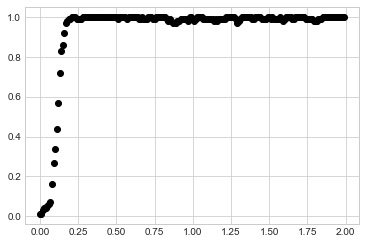

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

plt.plot(check_times, prop_inf, 'o', color='black');
